In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Data Exploration and Initial Analysis

The data in this dataframe was obtained by scraping the [World News API](https://worldnewsapi.com/) and by obtaining a safety index for nations from the [Global Resistance Index](https://globalresidenceindex.com/hnwi-index/safety-index/). 

## Features

Each row in this dataframe is a single article collected from the World News API. The information collected about the article is the date it was collected, the sentiment score of the article, the country where the article was published, the country that is referenced in the article, the url for the article and the safety index of the country.

In [54]:
news_data = pd.read_csv('Data News Sources.csv')
news_data.head()

,Unnamed: 0,date,sentiment,text,source_country,queried_country,url,Safety Index
0,0,2019-06-12 18:48:59,-0.308,It’s time we start talking about climate chang...,mx,Russia,https://www.amnesty.org/en/latest/news/2019/06...,0.585000
1,1,2019-07-12 17:14:00,-0.108,"Even now, as more frequent ""king tides"" bubble...",us,China,https://edition.cnn.com/2019/07/11/us/miami-li...,0.784286
2,2,2019-10-23 15:32:04,0.292,The second meeting of the Board of senior memb...,uz,Russia,http://www.uzreport.com/sco-interbank-associat...,0.585000
3,3,2019-10-23 15:34:13,0.398,The Shanghai Cooperation Organization establis...,uz,Russia,http://www.uzreport.com/entrepreneur-committee...,0.585000
4,4,2019-10-23 15:37:39,0.146,All participants of the exhibition “Tea and Co...,uz,Russia,http://www.uzreport.com/over-7000-people-visit...,0.585000


In [55]:
source_counts = news_data['source_country'].value_counts()
source_counts

us    127
cn     28
GB     23
in     21
jp     18
gb     16
au     14
CN     13
ca     11
es     10
lk     10
ru      9
eu      9
bh      8
eg      7
ie      7
fr      6
pk      6
ng      5
qa      5
mx      4
hk      3
gy      3
uz      3
et      2
tv      2
be      2
uy      2
sg      2
fm      2
de      2
lb      2
mv      1
se      1
so      1
it      1
ke      1
ir      1
kz      1
my      1
bm      1
Name: source_country, dtype: int64

In [56]:
queried_counts = news_data['queried_country'].value_counts()
queried_counts

United States    119
China            118
Russia            83
Belgium           76
Name: queried_country, dtype: int64

### Semantic Scores

In [57]:
positive_count = (news_data['sentiment'] > 0).sum()
print(f'Positive Count: {positive_count}')

negative_count = (news_data['sentiment'] < 0).sum()
print(f'Negative Count: {negative_count}')

neutral_count = (news_data['sentiment'] == 0).sum()
print(f'Neutral Count: {neutral_count}')

Positive Count: 219
Negative Count: 176
Neutral Count: 1


In [58]:
# median sentiment score for country
sentiment_median = news_data.groupby('queried_country')['sentiment'].median()
sentiment_median

queried_country
Belgium          0.0385
China            0.0140
Russia           0.0580
United States    0.0090
Name: sentiment, dtype: float64

## Figure 1

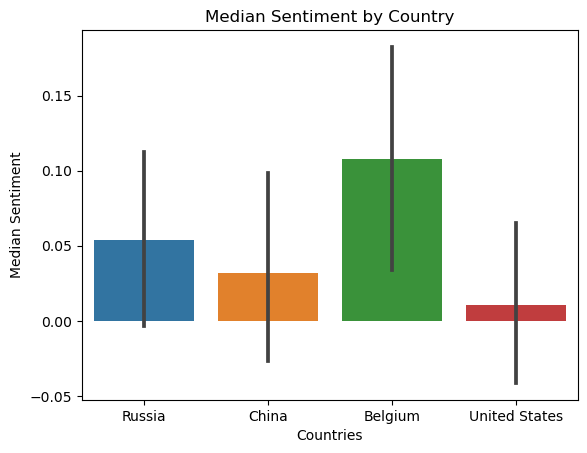

In [59]:
sns.barplot(x='queried_country', y='sentiment', data=news_data)

plt.xlabel("Countries")
plt.ylabel("Median Sentiment")
plt.title("Median Sentiment by Country")
plt.show()

In [60]:
# mean sentiment score for country
sentiment_mean = news_data.groupby('queried_country')['sentiment'].mean()
sentiment_mean

queried_country
Belgium          0.107763
China            0.031856
Russia           0.053554
United States    0.010504
Name: sentiment, dtype: float64

In [61]:
# max sentiment score for country
sentiment_max = news_data.groupby('queried_country')['sentiment'].max()
sentiment_max

queried_country
Belgium          0.830
China            1.000
Russia           0.985
United States    1.000
Name: sentiment, dtype: float64

In [62]:
# min sentiment score for country
sentiment_min = news_data.groupby('queried_country')['sentiment'].min()
sentiment_min

queried_country
Belgium         -0.574
China           -0.901
Russia          -1.000
United States   -0.912
Name: sentiment, dtype: float64

### Source country and queried country

In [72]:
contingency_table = pd.crosstab(news_data['source_country'], news_data['queried_country'])
contingency_table

queried_country,Belgium,China,Russia,United States
source_country,,,,
CN,1,5,2,5
GB,11,10,0,2
au,0,2,5,7
be,2,0,0,0
bh,0,0,6,2
bm,1,0,0,0
ca,3,0,1,7
cn,0,26,0,2
de,0,1,0,1


## Figure 2

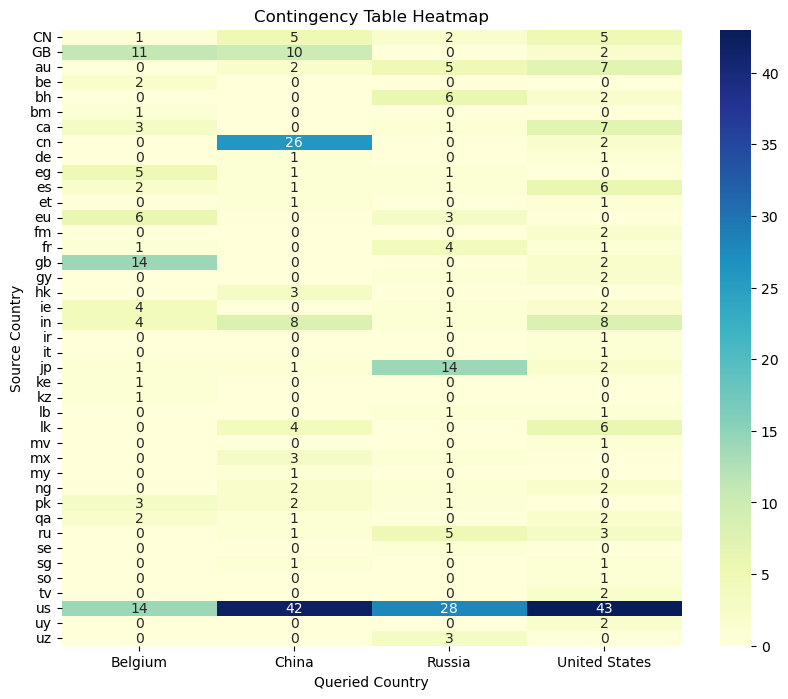

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Contingency Table Heatmap')
plt.xlabel('Queried Country')
plt.ylabel('Source Country')
plt.show()

In [73]:
news_data['date'] = pd.to_datetime(news_data['date'])

news_data['year_month'] = news_data['date'].dt.to_period('M')

monthly_sentiment = news_data.groupby(['year_month', 'queried_country'])['sentiment'].mean().reset_index()
monthly_sentiment['year_month'] = monthly_sentiment['year_month'].dt.to_timestamp()


## Figures 3 and 4

In [80]:
alt.Chart(monthly_sentiment).mark_line(point=True).encode(
    x='year_month:T',
    y='sentiment:Q'
).properties(
    title='Average Sentiment Score Over Time',
    width=500
)

alt.Chart(...)

In [78]:
alt.Chart(monthly_sentiment).mark_line(point=True).encode(
    x='year_month:T',
    y='sentiment:Q',
    color='queried_country:N',
    tooltip=['year_month:T', 'sentiment:Q', 'queried_country:N']
).properties(
    title='Average Sentiment Score Over Time by Source Country',
    width=800 
).interactive()

alt.Chart(...)